In [1]:
%matplotlib inline
# This is a simulation that demonstrates the difference between kNN and Linear Models
# Case 2: If the data can be viewed as mixture of low variance distributions
# Please refer to chapter 2 of reference book ESLII for details

In [2]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [3]:
mean_pos = [2,0]
cov_pos = [[3,0],[0,3]]
x_pos = np.random.multivariate_normal(mean_pos, cov_pos, 100)


mean_neg = [-2,0]
cov_neg = [[1,0],[0,1]]
x_neg = np.random.multivariate_normal(mean_neg, cov_neg, 100)

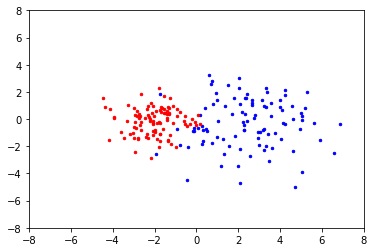

In [4]:
plt.xlim(-8,8)
plt.ylim(-8,8)
dot_size = 6
plt.scatter(x_pos[:,0], x_pos[:,1], color='blue',s=dot_size)
plt.scatter(x_neg[:,0], x_neg[:,1], color='red',s=dot_size)

In [5]:
data = np.vstack((x_pos,x_neg))
pos_len = x_pos.shape[0]
neg_len = x_neg.shape[0]
label = []
for _ in range(pos_len):
    label.append(1)
for _ in range(100):
    label.append(neg_len)

In [6]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log",tol=0.001)
clf.fit(data,label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
n_clf = KNeighborsClassifier(n_neighbors=5)
n_clf.fit(data,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
# Prepare for visualization
X=data
y=label
h=0.02
x_min, x_max = -8,8#X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = -8,8#X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['pink', 'blue', 'azure'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

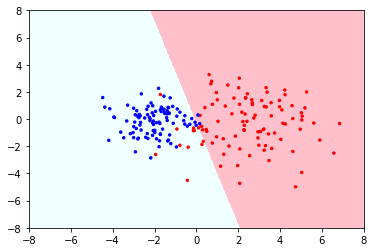

In [9]:
Z = clf.predict(np.c_[xx.flat, yy.flat])
Z = Z.reshape(xx.shape)
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=6)

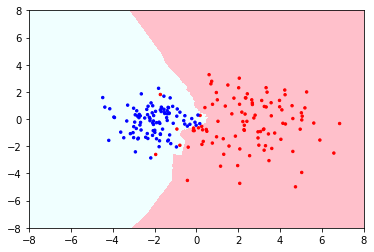

In [10]:
Z = n_clf.predict(np.c_[xx.flat, yy.flat])
Z = Z.reshape(xx.shape)
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=6)